<a href="https://colab.research.google.com/github/valegrei/genetic-algorithm-for-kmeans/blob/main/GKMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
* Víctor Augusto Alegre Ibáñez, 20130504C
* Romel Rolando Zavaleta Bueno, 20120236F

#Introducción

In [ ]:
#%xmode Verbose

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

##Iris dataset y K-Means

In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
lbls_est = kmeans.labels_

In [ ]:
#markers = ['o','v','D']
def graficar(clusters,centroides=None):
  fig, axs = plt.subplots(2,2,figsize=(12,10))
  for i in range(len(iris.target_names)): 
    axs[0,0].scatter(X[Y==i,1],X[Y==i,0],label=iris.target_names[i])
    axs[0,1].scatter(X[Y==i,3],X[Y==i,2],label=iris.target_names[i])
  for i in range(len(np.unique(clusters))): 
    axs[1,0].scatter(X[clusters==i,1],X[clusters==i,0],label=('Cluster '+str(i+1)))
    axs[1,1].scatter(X[clusters==i,3],X[clusters==i,2],label=('Cluster '+str(i+1)))
  if centroides is not None:
    for i in range(len(np.unique(clusters))): 
      axs[1,0].scatter(X[centroides[i],1],X[centroides[i],0],label=('Centroide '+str(i+1)),marker='s')
      axs[1,1].scatter(X[centroides[i],3],X[centroides[i],2],label=('Centroide '+str(i+1)),marker='s')

  axs[0,0].set(xlabel=iris.feature_names[1],ylabel=iris.feature_names[0])
  axs[0,0].legend()
  axs[0,1].set(xlabel=iris.feature_names[3],ylabel=iris.feature_names[2])
  axs[0,1].legend()
  axs[1,0].set(xlabel=iris.feature_names[1],ylabel=iris.feature_names[0])
  axs[1,0].legend()
  axs[1,1].set(xlabel=iris.feature_names[3],ylabel=iris.feature_names[2])
  axs[1,1].legend()
  plt.show()

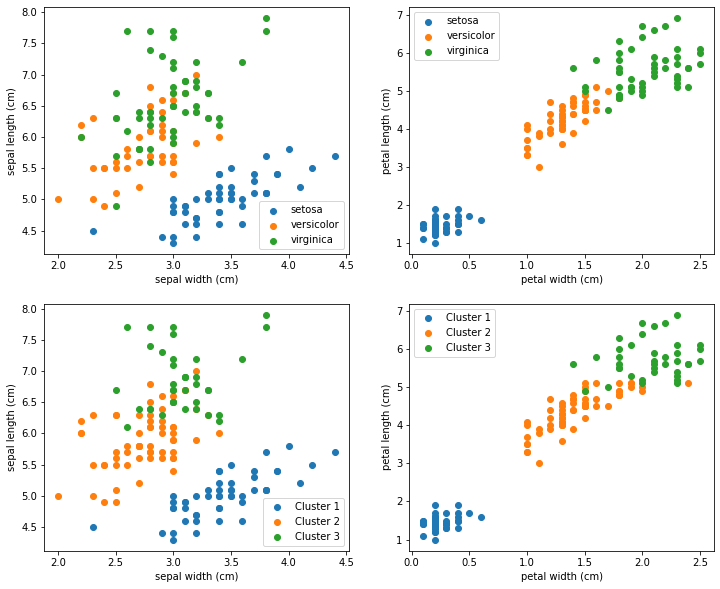

In [ ]:
graficar(lbls_est)

#Algoritmo Genético

##Representación
Para nuestro AG, representaremos el ADN de los individuos como cadenas de enteros, de tamaño $k$ ($k$ clústeres), cada gen representa el índice de la instancia que es el ***centroide*** de su respectivo clúster.

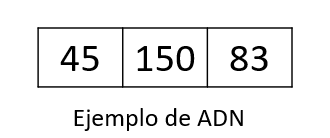

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Funciones a Minimizar:

In [ ]:
def dist_euclid(x,idx,cent_idxs):
  return np.sqrt(np.sum((x[cent_idxs,:] - x[idx,:])**2,axis=1))

def standar_fitness(x,cent_idxs):
  sum = 0
  for i in range(len(x)):
    sum += np.min(dist_euclid(x,i,cent_idxs))
  return 1/sum

In [ ]:
standar_fitness(X,np.array([50,16,23]))

0.006228861515928896

##Función para obtener las clases correspondientes

In [ ]:
def generar_clases(x,cent_idxs):
  clases = []
  for i in range(len(x)):
    clases.append(np.argmin(dist_euclid(x,i,cent_idxs)))
  return np.array(clases)

In [ ]:
generar_clases(X,np.array([50,16,23]))

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##Clase Individuo

In [ ]:
class Individuo:

  def __init__(self,min_k,max_k,bounds):
    #minimo y maximo de k clusteres
    self.min_k = min_k
    self.max_k = max_k
    #define tamano de ADN
    self.dna_size = np.random.choice(np.arange(min_k,max_k+1))
    #define valores minimos y maximos por cada variable o global
    self.bounds = bounds

    #Comprobando
    if self.bounds is not None and self.bounds[0] > self.bounds[1]:
      raise Exception(
        "El limite inferior no puede ser mayor que el superior"
        )
    
    self.genotipo = np.random.choice(np.arange(self.bounds[0],self.bounds[1]), size=self.dna_size, replace=False)
  
  def __repr__(self):
    texto = str(self.genotipo)
    return texto

  #Misma representacion
  def fenotipo(self):
    return self.genotipo

  #Evaluacion de fitness con la funcion objetivo
  def evaluar_funcion(self,funcion_obj,dataset):
    return funcion_obj(dataset,self.fenotipo())

  #Proceso de mutación
  def mutar(self,mutation_rate):
    for point in np.arange(self.dna_size): 
      if np.random.rand() < mutation_rate:
        self.genotipo[point] = np.random.choice(
            np.delete(np.arange(self.bounds[0], self.bounds[1]), self.genotipo))

  #Inserta un nuevo cluster
  def insert_cluster(self):
    self.genotipo = np.append(self.genotipo, np.random.choice(
        np.delete(np.arange(self.bounds[0], self.bounds[1]), self.genotipo)))
    self.dna_size = len(self.genotipo)
  
  #Elimina un cluster aleatoriamente
  def delete_cluster(self):
    self.genotipo = np.delete(self.genotipo,np.random.choice(np.arange(self.dna_size)))
    self.dna_size = len(self.genotipo)

  #Inserta o elimina cluster
  def ins_or_del_cluster(self,ins_del_prob):
    if np.random.rand()< ins_del_prob:
      if self.dna_size == self.min_k:
        self.insert_cluster()
      elif self.dna_size == self.max_k:
        self.delete_cluster()
      else:
        if np.random.choice([True,False]):
          self.insert_cluster()
        else:
          self.delete_cluster()

In [ ]:
#test 1
indv1 = Individuo(3,7,[0,150])
print(indv1)
print(indv1.fenotipo())
#test 2
#indv2 = Individuo(VAR_NUM,VAR_SIZE,X_BOUND,gray=True)
#print(indv2)
#print(indv2.fenotipo())
#print(indv2)
#indv1.mutar(0.1)
#indv1.insert_cluster()
indv1.ins_or_del_cluster(0.5)
print(indv1)
print(indv1.fenotipo())

[146 147  59 143  70]
[146 147  59 143  70]
[146 147  59 143  70  21]
[146 147  59 143  70  21]


In [ ]:
pob = np.array([Individuo(3,3,[0,150]),Individuo(3,3,[0,150]),Individuo(3,3,[0,150]),Individuo(3,3,[0,150])])
print(pob)
new_pob = np.append(pob,(Individuo(3,3,[0,150]),Individuo(3,3,[0,150])))
print(new_pob)

[[ 22 106  47] [67 73 62] [ 70 139  41] [134  63  16]]
[[ 22 106  47] [67 73 62] [ 70 139  41] [134  63  16] [115  58 104]
 [147 125  64]]


## Clase Poblacion

In [ ]:
class Poblacion:

  def __init__(self,pop_size,min_k,max_k,dataset,funcion,cross_rate,mutation_rate,ins_del_rate,n_generations,n_parents,
                n_gen_cond_parada,op_cross=0,op_muta=0,op_selec_padres=0,k_torneo = 3,op_selec_sobreviv=0):
    #define numero de poblacion
    self.pop_size = pop_size
    #dataset a clusterizar
    self.dataset = dataset
    #Nro minomo de clusters
    self.min_k = min_k
    #Nro maximo de clusteres
    self.max_k = max_k
    #define valores minimos y maximos por cada variable o global
    self.bounds = (0,self.dataset.shape[0])
    #define el ratio de cruzamiento
    self.cross_rate = cross_rate
    #define el ratio de mutacion
    self.mutation_rate = mutation_rate
    #define el ratio de insercion o eliminacion de clusteres
    self.ins_del_rate = ins_del_rate
    #define numero de generaciones
    self.n_generations = n_generations
    #define numero de padres
    self.n_parents = n_parents
    #define el numero de generaciones sin mejora del mejor fitness para detenerse
    self.n_gen_cond_parada = n_gen_cond_parada
    #define la funcion objetivo a maximizar
    self.func_obj = funcion

    self.op_cross = op_cross
    self.op_muta = op_muta
    self.k_torneo = k_torneo
    self.op_selec_padres = op_selec_padres
    self.op_selec_sobreviv = op_selec_sobreviv

    #Almacenara los valores con mejor fitness
    self.mejorIndiv = None
    self.mejorValor = None

    #generando
    self.individuos = []
    for i in range(self.pop_size):
      indiv = Individuo(self.min_k,self.max_k,self.bounds)
      self.individuos.append(indiv)
    self.individuos = np.array(self.individuos)
  
  def mostrar_individuos(self):
    print('GENOTIPOS')
    for i in range(self.pop_size):
      print(i,":",self.individuos[i])
  
  def mostrar_fenotipos(self):
    print('FENOTIPOS')
    for i in range(self.pop_size):
      print(i,":",self.individuos[i].fenotipo())

  #Proceso de cruzamiento
  def crossover(self,parent1,parent2,cross_rate):
    #Se copia a los padres previamente
    child1 = copy.deepcopy(parent1)
    child2 = copy.deepcopy(parent2)
    if np.random.rand() < cross_rate:
      cross_idx = np.random.choice(np.arange(1,self.min_k)) # Seleccion de punto de cruzamiento 
      str11 = child1.genotipo[:cross_idx]
      str12 = child1.genotipo[cross_idx:]
      str21 = child2.genotipo[:cross_idx]
      str22 = child2.genotipo[cross_idx:]
      #Hijos
      child1.genotipo = self.cross_centroides(str11,str22,str21)
      child1.dna_size = len(child1.genotipo)
      child2.genotipo = self.cross_centroides(str21,str12,str11)
      child2.dna_size = len(child2.genotipo)
    return (child1,child2)

  #Cruzamiento especial para no repetir centroides
  def cross_centroides(self,str1,str22,str21):
    ints1 = np.intersect1d(str1,str22)
    new_str = np.unique(np.append(str1,str22))
    if len(ints1) > 0: #si se repiten en la segunda cadena
      str21_filt = str21[[not obj in np.intersect1d(str1,str21) for obj in str21]]
      if len(str21_filt) > len(ints1):
        new_str = np.append(new_str, np.random.choice(str21_filt,len(ints1),replace=False))
      else:
        new_str = np.append(new_str,str21_filt)
    return new_str

  #Proceso de seleccion
  def select(self,fitness,cant_sel,tipo):
    #Comprobar que optimizar es correcto
    if not tipo in ['proporcional','ranking','torneo','uniforme','ruleta']:
      raise Exception(
        "El argumento tipo debe ser: 'proporcional','ranking','torneo','uniforme' o 'ruleta'"
      )
    if tipo=="proporcional":
      return self.select_proporcional(fitness,cant_sel)
    elif tipo=="ranking":
      return self.select_ranked(fitness,cant_sel)
    elif tipo=="torneo":
      return self.select_tournament(fitness,cant_sel)
    elif tipo=="uniforme":
      return self.select_uniform(fitness,cant_sel)
    elif tipo=="ruleta":
      return self.select_ruleta(fitness,cant_sel)
    elif tipo=="elitismo":
      return self.select_elitismo(fitness,cant_sel)
  
  def select_padres(self,fitness,cant_sel,op_selec,k=3):
    if op_selec == 0: # RULETA
      return self.select_ruleta(fitness,cant_sel)
    elif op_selec == 1: # TORNEO
      return self.select_tournament(fitness,cant_sel,k)

  def select_sobrevivientes(self,fitness,cant_sel,op_selec):
    if op_selec == 0: # RULETA
      return self.select_ruleta(fitness,cant_sel)
    elif op_selec == 1: # ELITISMO
      return self.select_elitismo(fitness,cant_sel)

  def obtener_fitness(self,individuos):
    #Comprobar que optimizar es correcto
    func_values = []
    for individuo in individuos: #evalua funcion a todos los individuos
      func_values.append(individuo.evaluar_funcion(self.func_obj,self.dataset))
    return np.array(func_values)
    
  def select_proporcional(self,fitness,cant_sel):
    return self.select_ruleta(fitness,cant_sel)

  def select_ranked(self,fitness,cant_sel):
    # La probabilidad con este método es inversamente proporcional a la
    # posición en la que quedan ordenados los individuos de menor a mayor
    # fitness.
    order = np.flip(np.argsort(a=fitness) + 1)
    ranks = np.argsort(order) + 1
    probabilidad_seleccion = 1 / ranks
    probabilidad_seleccion = probabilidad_seleccion / np.sum(probabilidad_seleccion)
    ind_seleccionado = np.random.choice(
        a = np.arange(len(self.individuos)),
        size = cant_sel,
        p = list(probabilidad_seleccion),
        replace = True
    )
    return self.individuos[ind_seleccionado]

  def select_tournament(self,fitness,cant_sel,k=3):
    ind_seleccionado = np.zeros(cant_sel,dtype=int)
    
    for i in np.arange(cant_sel):
      # Se seleccionan aleatoriamente k individuos.
      fit_idx = np.random.choice(np.arange(len(fitness)),k,replace=True)
      ind_final = fit_idx[np.argmax(fitness[fit_idx])]
      ind_seleccionado[i] = ind_final
    #print(ind_seleccionado)
    return self.individuos[ind_seleccionado]

  def select_uniform(self,fitness,cant_sel):
    # Cada individuo tiene la misma probabilidad para ser elegidos
    # independiente de su fitness.
    idx = np.random.choice(
        a = np.arange(len(self.individuos)),
        size = cant_sel,
        replace = True,
        p = np.repeat(1/len(self.individuos),len(self.individuos))
    )
    return self.individuos[idx]

  def select_ruleta(self,fitness,cant_sel):
    # Se calcula la probabilidad de selección de cada individuo en función
    # de su fitness.
    #self.mostrar_individuos()
    #print(fitness/fitness.sum())
    idx = np.random.choice(
        a = np.arange(len(self.individuos)),
        size = cant_sel,
        replace = True,
        p = fitness/fitness.sum()
    )
    return self.individuos[idx]

  def select_elitismo(self,fitness,cant_sel):
    # Se seleccionan los mejores fitness
    idx = (np.argsort(fitness)[::-1])[0:cant_sel-1]
    return self.individuos[idx]

  #Optimizacion de la funcion, evoluciona
  def optimizar(self):
    
    #guarda las intensidades
    self.mejorIndiv = []
    self.mejorValor = []
    bestGen = 0
    maxFit = 0

    #Evoluciona
    for i in range(self.n_generations):
      # Evolucion del AG
      fitness = self.obtener_fitness(self.individuos)
      #selecciona padres
      parents = self.select_padres(fitness,self.n_parents,self.op_selec_padres,k=self.k_torneo)
      #print(parents)
      #parents_copy = parents.copy()
      pop_copy = self.individuos.copy()
      #Crossover
      for parent1 in parents:
        #child = self.crossover(parent, parents_copy,self.cross_rate)
        parent2 = np.random.choice(pop_copy)
        new_childs = self.crossover(parent1, parent2,self.cross_rate)
        self.individuos = np.append(self.individuos,new_childs)
      #Muta a toda la poblacion
      for individuo in self.individuos:
        individuo.mutar(self.mutation_rate)
      #Elimina o Inserta clusteres en la poblacion
      if self.max_k > self.min_k:
        for individuo in self.individuos:
          individuo.ins_or_del_cluster(self.ins_del_rate)

      #selecciona nueva generacion
      new_fitness = self.obtener_fitness(self.individuos)
      seleccionados = self.select_sobrevivientes(new_fitness,self.pop_size,self.op_selec_sobreviv)
      
      self.individuos = seleccionados  #reemplaza a la poblacion

      #Calcula el mejor de la generacion
      fit = self.obtener_fitness(self.individuos)
      bestFit = np.max(fit)
      bestIndv = copy.deepcopy(self.individuos[np.argmax(fit)])
      self.mejorIndiv.append(bestIndv)
      self.mejorValor.append(bestFit)

      if bestFit > maxFit:
        maxFit = bestFit
        bestGen = i

      #Condicion de parada
      if i - bestGen >= self.n_gen_cond_parada:
        break

    return (self.mejorIndiv,self.mejorValor)

#Optimización de Parámetros

##Parametros Simbólicos
* Operacion de Cruce:
  * Un punto
* Operacion de Mutación:
  * Reemplazo
* Inserción/Eliminación de clústeres (Solo aplica cuando K max != k min)
* Selección de Padres:
  * Torneo
* Selección de Sobrevivientes:
  * Elitismo

##Parámetros Numéricos:
* Tamaño de Población
* Número de Padres
* % de Recombinación
* % de Mutación
* % de Inserción/Eliminación de Clústeres (Solo aplica cuando K max != k min)
* % de Pob. participante para torneo
* Nro de generaciones sin mejora (cond. de parada)



##Espacio de Búsqueda

In [ ]:
NRO_AG = 1
NRO_INST_AG = 10
MIN_K = 3
MAX_K = 3
N_GEN_COND_PARADA = 50
#SIMBOLICOS
OP_SEL_PADRES = [0,1]
OP_SEL_SOBREVIV = [0,1]
# Definiendo los parametros de entrada
MAX_GENERACIONES = 200
MUTAT_RATE = [0.0001,0.001,0.01,0.1,0.2]
INSDEL_RATE = [0.0001,0.001,0.01,0.1,0.2]
CROSS_RATE = [0.01,0.1,0.2,0.4,0.5,0.6,0.8,0.9,1.0]
POP_SIZE = [10,30,50,60,100]   # tamaño de la poblacion
P_PADRES = [0.4,0.5,0.6,0.9,1.0]
P_K_TORNEO = [0.2,0.3,0.4,0.5]
COND_PARADA = [5,10,20,30,40,50]

##Para Nro fijo de clusteres
Usando K = 3 clusteres

###Muestreo

In [ ]:
def parametros_numericos_aleatorios(nro,op_sel_padres):
  parametros = []
  for i in range(nro):
    mutat_rate = np.random.choice(MUTAT_RATE)
    cross_rate = np.random.choice(CROSS_RATE)
    pop_size = np.random.choice(POP_SIZE)
    cond_parada = np.random.choice(COND_PARADA)
    n_padres = int(np.random.choice(P_PADRES)*pop_size)
    k_torneo = None
    if op_sel_padres == 1: # TORNEO
      k_torneo = int(np.random.choice(P_K_TORNEO)*pop_size)
    parametros.append({
        'mutat_rate':mutat_rate,
        'cross_rate':cross_rate,
        'pop_size':pop_size,
        'n_padres':n_padres,
        'k_torneo':k_torneo,
        'cond_parada':cond_parada
    })
  return parametros

In [ ]:
parametros_simbolicos = []
#parametros_simbolicos.append({'op_sel_padres':0,'op_sel_sobreviv':0})
#parametros_simbolicos.append({'op_sel_padres':0,'op_sel_sobreviv':1})
#parametros_simbolicos.append({'op_sel_padres':1,'op_sel_sobreviv':0})
parametros_simbolicos.append({'op_sel_padres':1,'op_sel_sobreviv':1})
parametros_numericos = []
for param in parametros_simbolicos:
  parametros_numericos.append(parametros_numericos_aleatorios(NRO_INST_AG,param['op_sel_padres']))

print(parametros_simbolicos)
print(parametros_numericos)

[{'op_sel_padres': 1, 'op_sel_sobreviv': 1}]
[[{'mutat_rate': 0.2, 'cross_rate': 0.01, 'pop_size': 10, 'n_padres': 6, 'k_torneo': 2, 'cond_parada': 30}, {'mutat_rate': 0.2, 'cross_rate': 0.5, 'pop_size': 10, 'n_padres': 4, 'k_torneo': 5, 'cond_parada': 10}, {'mutat_rate': 0.4, 'cross_rate': 0.6, 'pop_size': 10, 'n_padres': 4, 'k_torneo': 4, 'cond_parada': 50}, {'mutat_rate': 0.3, 'cross_rate': 0.8, 'pop_size': 100, 'n_padres': 60, 'k_torneo': 20, 'cond_parada': 30}, {'mutat_rate': 0.6, 'cross_rate': 0.6, 'pop_size': 100, 'n_padres': 100, 'k_torneo': 30, 'cond_parada': 30}, {'mutat_rate': 0.9, 'cross_rate': 0.9, 'pop_size': 60, 'n_padres': 30, 'k_torneo': 12, 'cond_parada': 40}, {'mutat_rate': 0.4, 'cross_rate': 0.5, 'pop_size': 100, 'n_padres': 40, 'k_torneo': 50, 'cond_parada': 30}, {'mutat_rate': 0.0001, 'cross_rate': 0.1, 'pop_size': 60, 'n_padres': 54, 'k_torneo': 12, 'cond_parada': 10}, {'mutat_rate': 0.1, 'cross_rate': 0.2, 'pop_size': 60, 'n_padres': 54, 'k_torneo': 12, 'cond_pa

###Test

In [ ]:
param_resultados = []  #Promedio de mejores fitnes
for i in range(len(parametros_simbolicos)):
  param_s = parametros_simbolicos[i]
  mbf = []
  aes = []
  for j in range(len(parametros_numericos[i])):
    param_n = parametros_numericos[i][j]
    bf = [] #mejor fitnes
    bgen = [] #Generacion del mejor fitnes
    for _ in range(5): # Estadistico de 10
      pop = Poblacion(
          pop_size=param_n['pop_size'],
          min_k = MIN_K,
          max_k = MAX_K,
          dataset = X,
          funcion = standar_fitness,
          cross_rate = param_n['cross_rate'],
          mutation_rate = param_n['mutat_rate'],
          ins_del_rate = 0,
          n_generations = MAX_GENERACIONES,
          n_parents = param_n['n_padres'],
          n_gen_cond_parada = param_n['cond_parada'],
          op_selec_padres = param_s['op_sel_padres'],
          op_selec_sobreviv = param_s['op_sel_sobreviv'],
          k_torneo = param_n['k_torneo']
      )
      (_, mejorValor) = pop.optimizar()
      bf.append(np.max(mejorValor))
      bgen.append(np.argmax(mejorValor)+1)
    #mbf.append(np.mean(bf))
    #aes.append(np.mean(bgen))
  #best_idx = np.argmax(mbf) # indice de Mejor de fitness
    param_res = copy.deepcopy(param_s)
    param_res.update(param_n)
    param_res['mbf'] = np.mean(bf)
    param_res['aes'] = np.mean(bgen)
    param_resultados.append(param_res)

###Resultados

In [ ]:
df = pd.DataFrame(param_resultados)
df

,op_sel_padres,op_sel_sobreviv,mutat_rate,cross_rate,pop_size,n_padres,k_torneo,cond_parada,mbf,aes
0,1,1,0.2000,0.01,10,6,2,30,0.010064,39.4
1,1,1,0.2000,0.50,10,4,5,10,0.009872,10.8
2,1,1,0.4000,0.60,10,4,4,50,0.009905,41.6
3,1,1,0.3000,0.80,100,60,20,30,0.010160,14.6
4,1,1,0.6000,0.60,100,100,30,30,0.010175,21.8
5,1,1,0.9000,0.90,60,30,12,40,0.009973,30.6
6,1,1,0.4000,0.50,100,40,50,30,0.010175,25.2
7,1,1,0.0001,0.10,60,54,12,10,0.009400,1.6
8,1,1,0.1000,0.20,60,54,12,20,0.010175,18.0
9,1,1,0.4000,0.10,30,12,6,50,0.009994,23.4


In [ ]:
df[(df.mbf == df.mbf.max())]

,op_sel_padres,op_sel_sobreviv,mutat_rate,cross_rate,pop_size,n_padres,k_torneo,cond_parada,mbf,aes
6,1,1,0.4,0.5,100,40,50,30,0.010175,25.2
8,1,1,0.1,0.2,60,54,12,20,0.010175,18.0


In [ ]:
pop = Poblacion(
          pop_size=60,
          min_k = MIN_K,
          max_k = MAX_K,
          dataset = X,
          funcion = standar_fitness,
          cross_rate = 0.2,
          mutation_rate = 0.1,
          ins_del_rate = 0,
          n_generations = MAX_GENERACIONES,
          n_parents = 54,
          n_gen_cond_parada = 20,
          op_selec_padres = 1,
          op_selec_sobreviv = 1,
          k_torneo = 12
      )
(mejoresIndv,mejoresVals) = pop.optimizar()

No handles with labels found to put in legend.


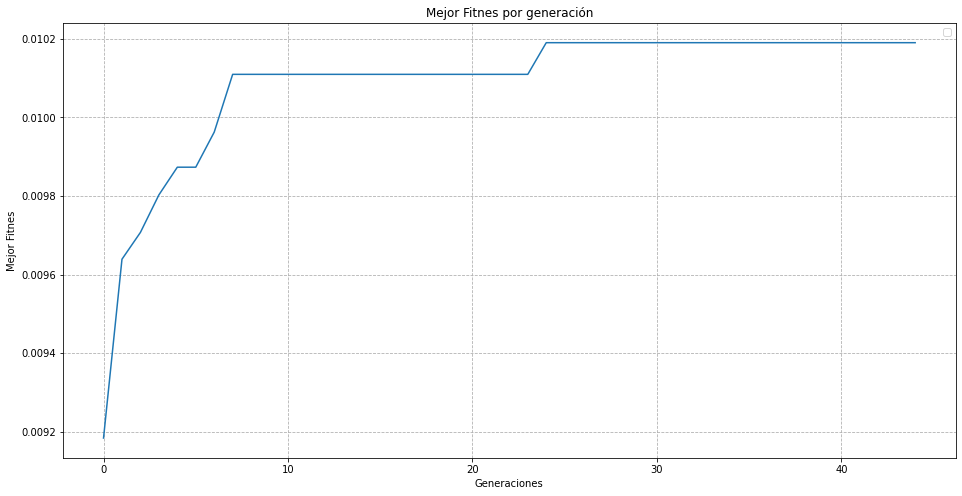

In [ ]:
#Evolución de mejores fitnes por generacion
generaciones = np.arange(len(mejoresVals))
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(generaciones,mejoresVals)
#ax.plot(generaciones,mejores_x_generacion2,label = 'Parametros optimos del mejor MBF')
#plt.xticks(np.linspace(0.0,1.0,21))
plt.xlabel('Generaciones')
plt.ylabel('Mejor Fitnes')
ax.legend()
plt.title('Mejor Fitnes por generación')
plt.grid(linestyle = '--')
plt.show()

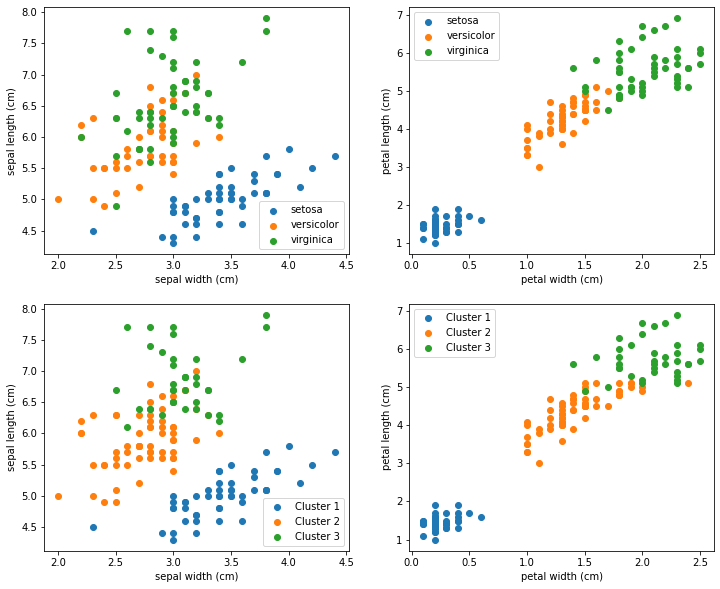

Mejor fitnes: 0.010190443607840041
Generacion: 24


In [ ]:
np.max(mejoresVals)
mejor3 = mejoresIndv[np.argmax(mejoresVals)]
clases3 = generar_clases(X,mejor3.fenotipo())
graficar(clases3)
print("Mejor fitnes:",np.max(mejoresVals))
print("Generacion:",np.argmax(mejoresVals))
#print(len(mejoresVals))

In [ ]:
#Y
#lbls_est
sum = 0
sum += np.sum([clases3[i] == 0 and Y[i] == 0 for i in range(len(Y))])
sum += np.sum([clases3[i] == 1 and Y[i] == 1 for i in range(len(Y))])
sum += np.sum([clases3[i] == 2 and Y[i] == 2 for i in range(len(Y))])
print(sum)

134


##Para Nro variante de Clústeres
Con k de 2 a 7

###Muestreo

In [ ]:
def parametros_numericos_aleatorios2():
  parametros = []
  for i in range(len(INSDEL_RATE)):
    parametros.append({
        'mutat_rate':0.1,
        'cross_rate':0.2,
        'pop_size':60,
        'n_padres':54,
        'k_torneo':12,
        'cond_parada':20,
        'insdel_rate':INSDEL_RATE[i]
    })
  return parametros

In [ ]:
MIN_K = 2
MAX_K = 7
parametros_numericos2 = parametros_numericos_aleatorios2()
print(parametros_numericos2)

[{'mutat_rate': 0.1, 'cross_rate': 0.2, 'pop_size': 60, 'n_padres': 54, 'k_torneo': 12, 'cond_parada': 20, 'insdel_rate': 0.0001}, {'mutat_rate': 0.1, 'cross_rate': 0.2, 'pop_size': 60, 'n_padres': 54, 'k_torneo': 12, 'cond_parada': 20, 'insdel_rate': 0.001}, {'mutat_rate': 0.1, 'cross_rate': 0.2, 'pop_size': 60, 'n_padres': 54, 'k_torneo': 12, 'cond_parada': 20, 'insdel_rate': 0.01}, {'mutat_rate': 0.1, 'cross_rate': 0.2, 'pop_size': 60, 'n_padres': 54, 'k_torneo': 12, 'cond_parada': 20, 'insdel_rate': 0.1}, {'mutat_rate': 0.1, 'cross_rate': 0.2, 'pop_size': 60, 'n_padres': 54, 'k_torneo': 12, 'cond_parada': 20, 'insdel_rate': 0.2}]


###Test

In [ ]:
param_resultados = []  #Promedio de mejores fitnes
for i in range(len(parametros_numericos2)):
  param_n = parametros_numericos2[i]
  bf = [] #mejor fitnes
  bgen = [] #Generacion del mejor fitnes
  for _ in range(5): # Estadistico de 10
    pop = Poblacion(
      pop_size=param_n['pop_size'],
      min_k = MIN_K,
      max_k = MAX_K,
      dataset = X,
      funcion = standar_fitness,
      cross_rate = param_n['cross_rate'],
      mutation_rate = param_n['mutat_rate'],
      ins_del_rate = 0,
      n_generations = MAX_GENERACIONES,
      n_parents = param_n['n_padres'],
      n_gen_cond_parada = param_n['cond_parada'],
      op_selec_padres = 1,
      op_selec_sobreviv = 1,
      k_torneo = param_n['k_torneo']
    )
    (_, mejorValor) = pop.optimizar()
    bf.append(np.max(mejorValor))
    bgen.append(np.argmax(mejorValor)+1)
  param_res = copy.deepcopy(param_n)
  param_res['mbf'] = np.mean(bf)
  param_res['aes'] = np.mean(bgen)
  param_resultados.append(param_res)

###Resultado

In [ ]:
df = pd.DataFrame(param_resultados)
df

,mutat_rate,cross_rate,pop_size,n_padres,k_torneo,cond_parada,insdel_rate,mbf,aes
0,0.1,0.2,60,54,12,20,0.0001,0.014472,53.0
1,0.1,0.2,60,54,12,20,0.0010,0.014458,57.2
2,0.1,0.2,60,54,12,20,0.0100,0.014498,61.6
3,0.1,0.2,60,54,12,20,0.1000,0.014514,54.6
4,0.1,0.2,60,54,12,20,0.2000,0.014475,49.4


In [ ]:
df[(df.mbf == df.mbf.max())]

,mutat_rate,cross_rate,pop_size,n_padres,k_torneo,cond_parada,insdel_rate,mbf,aes
3,0.1,0.2,60,54,12,20,0.1,0.014514,54.6


In [ ]:
pop = Poblacion(
          pop_size=60,
          min_k = MIN_K,
          max_k = MAX_K,
          dataset = X,
          funcion = standar_fitness,
          cross_rate = 0.2,
          mutation_rate = 0.1,
          ins_del_rate = 0.1,
          n_generations = MAX_GENERACIONES,
          n_parents = 54,
          n_gen_cond_parada = 20,
          op_selec_padres = 1,
          op_selec_sobreviv = 1,
          k_torneo = 12
      )
(mejoresIndv,mejoresVals) = pop.optimizar()

No handles with labels found to put in legend.


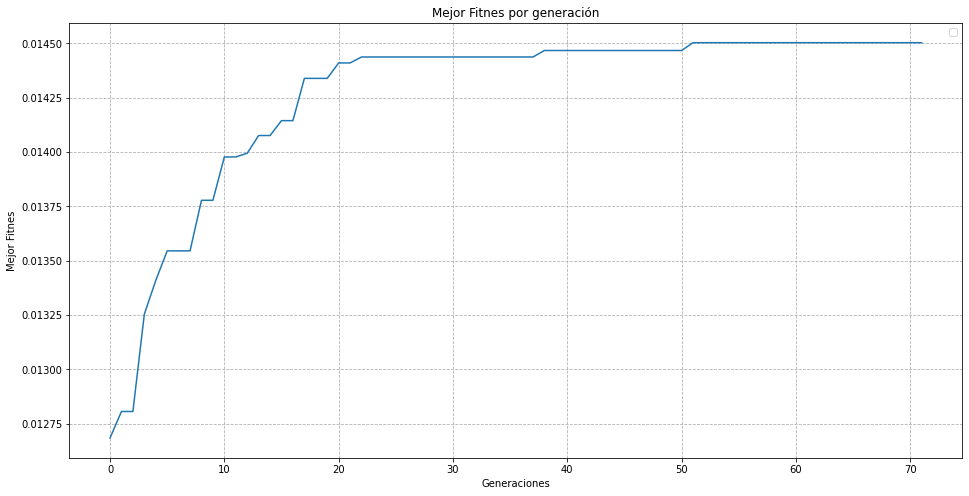

In [ ]:
#Evolución de mejores fitnes por generacion
generaciones = np.arange(len(mejoresVals))
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(generaciones,mejoresVals)
#ax.plot(generaciones,mejores_x_generacion2,label = 'Parametros optimos del mejor MBF')
#plt.xticks(np.linspace(0.0,1.0,21))
plt.xlabel('Generaciones')
plt.ylabel('Mejor Fitnes')
ax.legend()
plt.title('Mejor Fitnes por generación')
plt.grid(linestyle = '--')
plt.show()

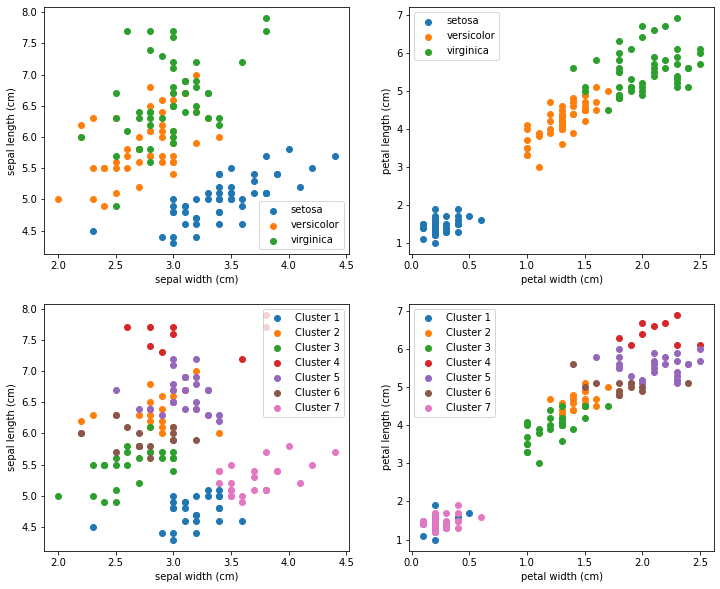

Mejor fitnes: 0.014502939900321248
Generacion: 51


In [ ]:
np.max(mejoresVals)
mejor3 = mejoresIndv[np.argmax(mejoresVals)]
clases3 = generar_clases(X,mejor3.fenotipo())
graficar(clases3)
print("Mejor fitnes:",np.max(mejoresVals))
print("Generacion:",np.argmax(mejoresVals))
#print(len(mejoresVals))